In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

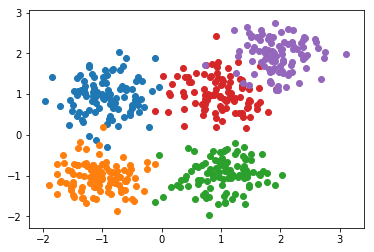

In [11]:
n_pts=500
centers=[[-1,1],[-1,-1],[1,-1],[1,1],[2,2]]
X,y=datasets.make_blobs(n_samples=n_pts,random_state=123,centers=centers,cluster_std=0.4)
# print(X)
# print(y)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])

In [12]:
print(y)
y_cat=to_categorical(y,5)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [13]:
model=Sequential()
model.add(Dense(5,input_shape=(2,),activation='softmax'))
model.compile(Adam(lr=0.1),loss='categorical_crossentropy',metrics=['accuracy'])


In [14]:
h=model.fit(x=X,y=y_cat,verbose=1,batch_size=50,epochs=100)

Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 0.8251 - acc: 0.7520
Epoch 2/100
500/500 [==============================] - 0s 181us/step - loss: 0.3815 - acc: 0.9300
Epoch 3/100
500/500 [==============================] - 0s 181us/step - loss: 0.2722 - acc: 0.9480
Epoch 4/100
500/500 [==============================] - 0s 309us/step - loss: 0.2228 - acc: 0.9620
Epoch 5/100
500/500 [==============================] - 0s 254us/step - loss: 0.1941 - acc: 0.9660
Epoch 6/100
500/500 [==============================] - 0s 195us/step - loss: 0.1782 - acc: 0.9680
Epoch 7/100
500/500 [==============================] - 0s 217us/step - loss: 0.1659 - acc: 0.9640
Epoch 8/100
500/500 [==============================] - 0s 392us/step - loss: 0.1581 - acc: 0.9680
Epoch 9/100
500/500 [==============================] - 0s 565us/step - loss: 0.1482 - acc: 0.9700
Epoch 10/100
500/500 [==============================] - 0s 283us/step - loss: 0.1416 - acc: 0.9680
Epoch 11/100
500/500 

In [15]:
def plot_decision_boundary(X,y,model):
    x_span=np.linspace(min(X[:,0])-1,max(X[:,0])+1,50)
    #print(x_span)
    y_span=np.linspace(min(X[:,1])-1,max(X[:,1])+1,50)
    xx, yy=np.meshgrid(x_span,y_span)
#     print(xx)
#     print(yy)
    xx_,yy_=xx.ravel(),yy.ravel()
#     print(xx_)
    grid=np.c_[xx_,yy_]
    pred_func=model.predict_classes(grid)
    z=pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

Prediction is: [3]


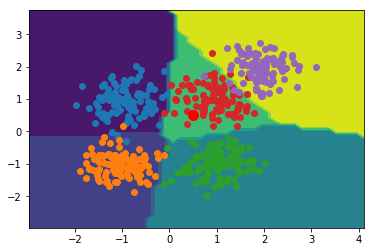

In [16]:
plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.scatter(X[y==3,0],X[y==3,1])
plt.scatter(X[y==4,0],X[y==4,1])
x=0.5
y=0.5
point=np.array([[x,y]])
prediction=model.predict_classes(point)
plt.plot([x],[y],marker="o",markersize=10,color="red")
print("Prediction is:", prediction)

Text(0.5,1,'accuracy')

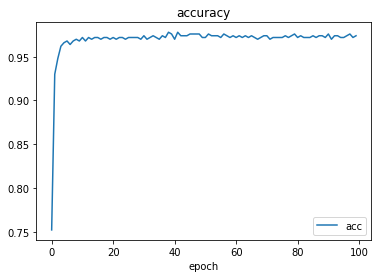

In [17]:
plt.plot(h.history['acc'])
#plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.legend(['acc'])

plt.title('accuracy')